# **Topic modeling**


Topic modeling is a frequently used approach that leverages unsupervised machine learning to discover hidden semantic patterns portrayed by a text corpus and automatically identify topics that exist inside it.

---

# **Importing Libraries**

In [52]:
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

# **Reading Data**

In [3]:
data_frame = pd.read_csv("//content/drive/MyDrive/NlP project/articles1.csv")
data_frame.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


# **Data Cleansing**

**Deal with missing values**

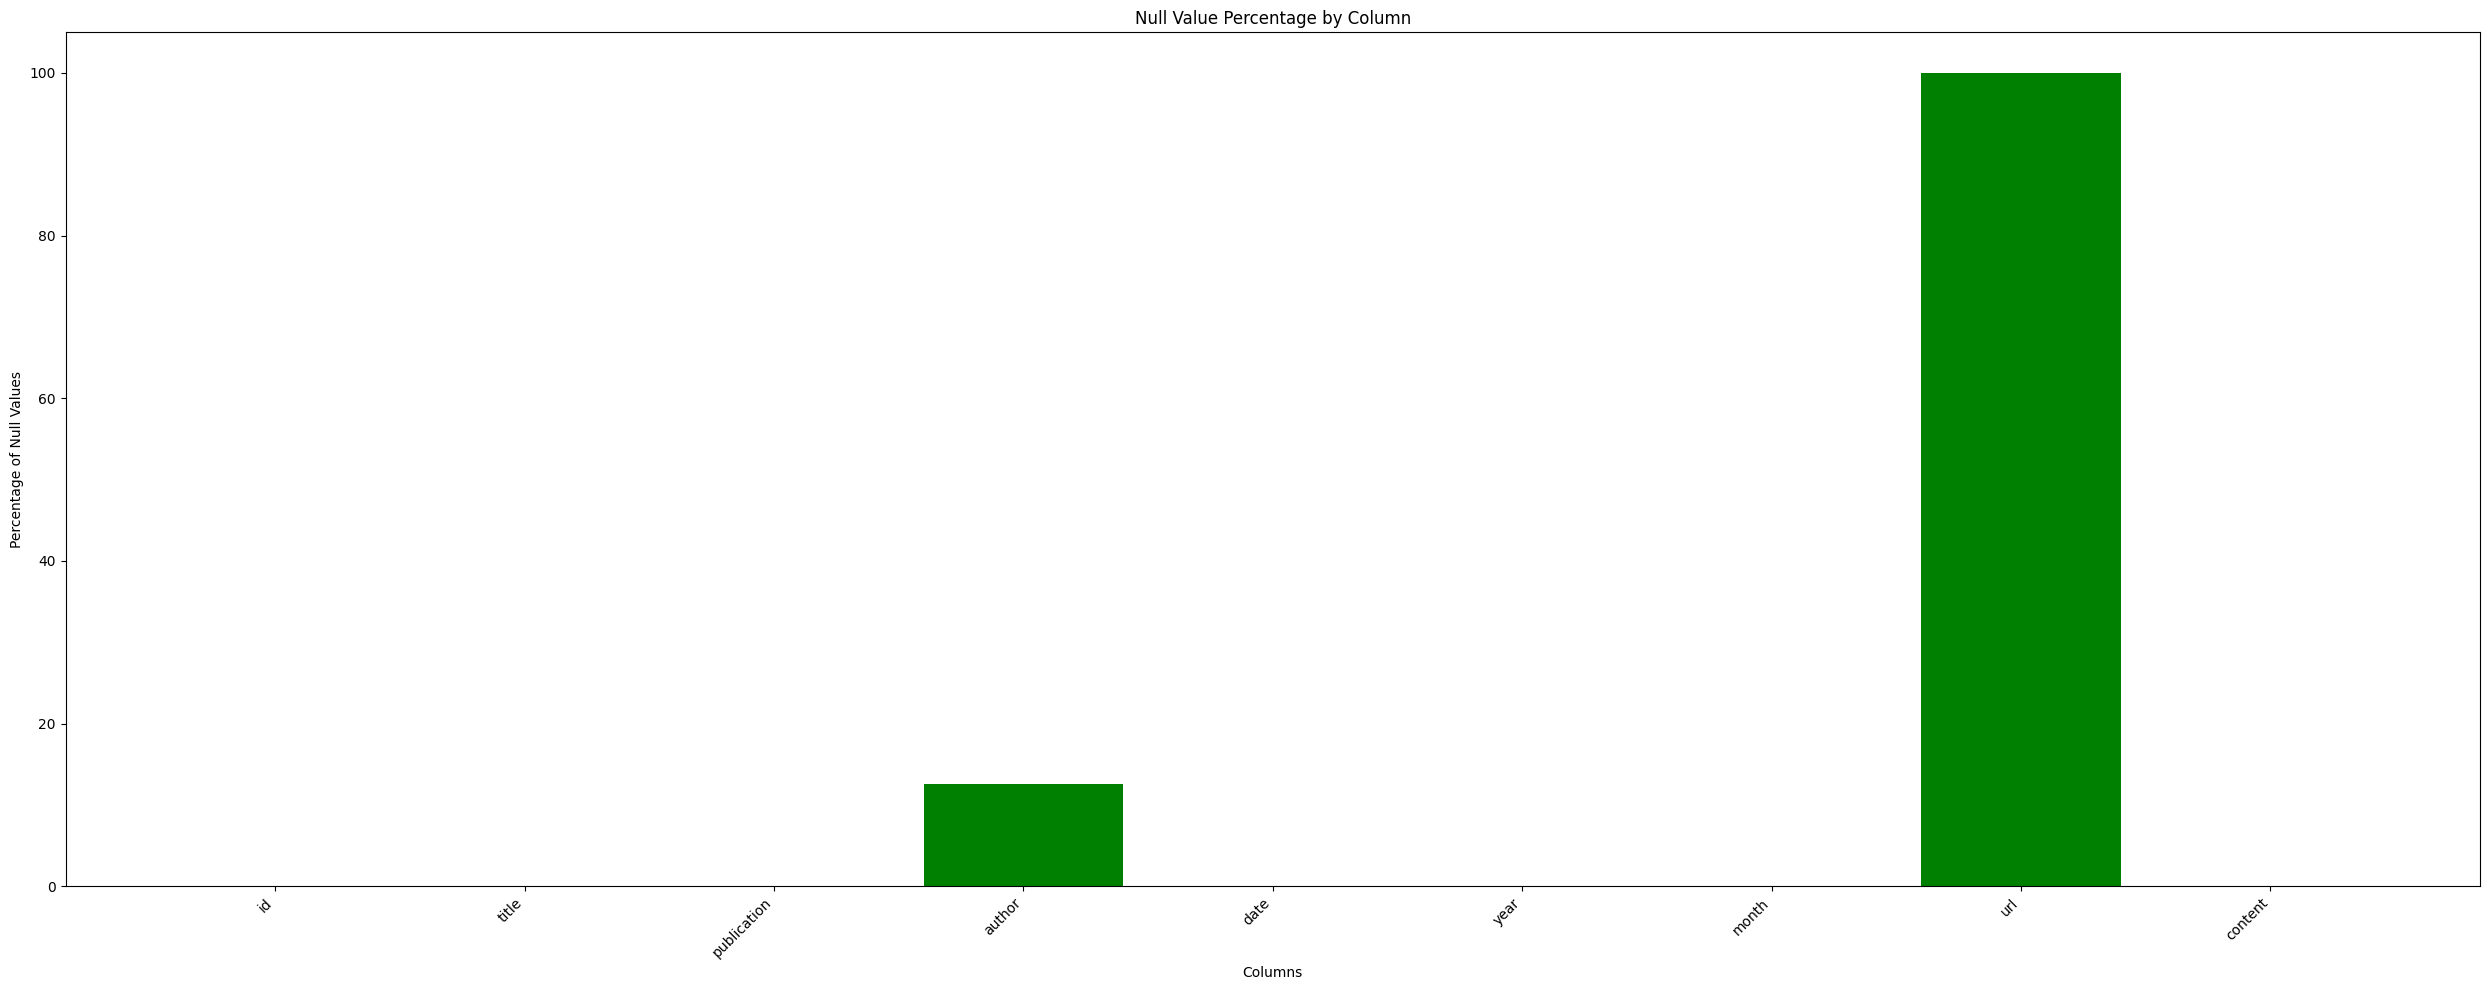

percentage of nulls for each column
Unnamed: 0       0.000
id               0.000
title            0.000
publication      0.000
author          12.612
date             0.000
year             0.000
month            0.000
url            100.000
content          0.000
dtype: float64


In [4]:
# Calculate percentage of nulls for each column
null_percent = (data_frame.isnull().sum() / len(data_frame)) * 100

# Drop the first column if you want to exclude it from the plot
null_percent_plot = null_percent.drop(index=data_frame.columns[0])

# Plotting
plt.figure(figsize=(25, 10))
plt.bar(null_percent_plot.index, null_percent_plot.values, color='green')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Null Value Percentage by Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print full null percentage summary
print("percentage of nulls for each column")
print(null_percent)

In [5]:
# Remove url column because it's empty(100% null values)
data_frame.drop(columns=['url'], inplace=True)
data_frame.isnull().sum() / len(data_frame) * 100


,0
Unnamed: 0,0.000
id,0.000
title,0.000
publication,0.000
author,12.612
date,0.000
year,0.000
month,0.000
content,0.000


In [6]:
# Get percentage of number of rows contain missing values
mask = data_frame.isnull().any(axis=1)
rows_with_missing_values = mask.sum() / len(data_frame)*100
print("Number of rows contain null values =", rows_with_missing_values, "%")


Number of rows contain null values = 12.612000000000002 %


In [7]:
# Drop rows contain null values
data_frame.dropna(inplace=True)
data_frame.isnull().sum() / len(data_frame) * 100


,0
Unnamed: 0,0.0
id,0.0
title,0.0
publication,0.0
author,0.0
date,0.0
year,0.0
month,0.0
content,0.0


In [8]:
data_frame.dtypes


,0
Unnamed: 0,int64
id,int64
title,object
publication,object
author,object
date,object
year,float64
month,float64
content,object


**Changing dtypes**

In [9]:
# Convert all object-type columns to string type
object_columns = data_frame.select_dtypes(include='object').columns
data_frame[object_columns] = data_frame[object_columns].astype('string')

# Confirm the changes
print(data_frame.dtypes)


Unnamed: 0              int64
id                      int64
title          string[python]
publication    string[python]
author         string[python]
date           string[python]
year                  float64
month                 float64
content        string[python]
dtype: object


**Dealing with Datetime format**

In [10]:
# Ensure 'date' column is in datetime format
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce')

# Extract the day from the 'date' column
data_frame['day'] = data_frame['date'].dt.day

# Option 1: Replace 'date' column with 'day' column
data_frame.drop(columns=['date'], inplace=True)

**Drop un nesessary coulmns**

In [11]:
data_frame.drop(columns=['id'], inplace=True)

**Casting**

In [12]:
data_frame['year'] = data_frame['year'].astype('Int64')
data_frame['month'] = data_frame['month'].astype('Int64')


In [13]:
data_frame.dtypes

,0
Unnamed: 0,int64
title,string[python]
publication,string[python]
author,string[python]
year,Int64
month,Int64
content,string[python]
day,int32


In [15]:
data_frame.head()

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016,12,WASHINGTON — Congressional Republicans have...,31
1,1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017,6,"After the bullet shells get counted, the blood...",19
2,2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri...",6
3,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017,4,"Death may be the great equalizer, but it isn’t...",10
4,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017,1,"SEOUL, South Korea — North Korea’s leader, ...",2


# Text Preprocessing NLP Pipeline
## 1- Convert to lowercase

In [19]:
columns = ["title", "publication", "author", "content"]

data_frame[columns] = data_frame[columns].apply(lambda x: x.str.lower())


## 2- Remove HTML Tags





In [20]:
def remove_HTML_tags(text):
    return re.sub(r'<.*?>', "", text)

columns = ["title", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_HTML_tags(x))

## 3- Remove URLs





In [21]:
def remove_URLs(text):
    return re.sub(r'https?://\S+www\.\S+', "", text)

columns = ["title", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_URLs(x))

## 4- Remove unnecessary words





In [22]:
# remove unnecessary words
# remove publication from title
publication_unique_values = data_frame["publication"].unique()
for publication in publication_unique_values:
    data_frame["title"] = data_frame['title'].str.replace("." + publication + "$", "", regex=True)


## 5- Apply Tokenization
### a- Apply sentence tokenization

In [ ]:
def sentence_tokenizer(text):
    return sent_tokenize(text)


columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: sentence_tokenizer(x))

data_frame[['title', 'content']]

### b- Apply word tokenization

In [27]:
def word_tokenizer(sentences):
    tokenized_words = []
    for x in sentences:
        tokenized_words = tokenized_words + word_tokenize(x)
    return tokenized_words


columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: word_tokenizer(x))

data_frame.head()

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, about, winning, their, health, care, suit, -, the]",new york times,carl hulse,2016,12,"[washington, —, congressional, republicans, have, a, new, fear, when, it, comes, to, their, health, care, lawsuit, against, the, obama, administration, :, they, might, win, ., the, incoming, trump, administration, could, choose, to, no, longer, defend, the, executive, branch, against, the, suit, ,, which, challenges, the, administration, ’, s, authority, to, spend, billions, of, dollars, on, health, insurance, subsidies, for, and, americans, ,, handing, house, republicans, a, big, victory, on, issues, ., but, a, sudden, loss, of, the, disputed, subsidies, could, conceivably, cause, the, health, care, program, to, implode, ,, leaving, millions, of, people, without, access, to, health, insurance, before, republicans, ...]",31
1,1,"[rift, between, officers, and, residents, as, killings, persist, in, south, bronx, -, the]",new york times,benjamin mueller and al baker,2017,6,"[after, the, bullet, shells, get, counted, ,, the, blood, dries, and, the, votive, candles, burn, out, ,, people, peer, down, from, windows, and, see, crime, scenes, gone, cold, :, a, band, of, yellow, police, tape, blowing, in, the, breeze, ., the, south, bronx, ,, just, across, the, harlem, river, from, manhattan, and, once, shorthand, for, urban, dysfunction, ,, still, suffers, violence, at, levels, long, ago, slashed, in, many, other, parts, of, new, york, city, ., and, yet, the, city, ’, s, efforts, to, fight, it, remain, splintered, ,, underfunded, and, burdened, by, scandal, ., in, the, 40th, precinct, ,, at, ...]",19
2,2,"[tyrus, wong, ,, ‘, bambi, ’, artist, thwarted, by, racial, bias, ,, dies, at, 106, -, the]",new york times,margalit fox,2017,1,"[when, walt, disney, ’, s, “, bambi, ”, opened, in, 1942, ,, critics, praised, its, spare, ,, haunting, visual, style, ,, vastly, different, from, anything, disney, had, done, before, ., but, what, they, did, not, know, was, that, the, film, ’, s, striking, appearance, had, been, created, by, a, chinese, immigrant, artist, ,, who, took, as, his, inspiration, the, landscape, paintings, of, the, song, dynasty, ., the, extent, of, his, contribution, to, “, bambi, ,, ”, which, remains, a, mark, for, film, animation, ,, would, not, be, widely, known, for, decades, ., like, the, film, ’, s, title, character, ,, ...]",6
3,3,"[among, deaths, in, 2016, ,, a, heavy, toll, in, pop, music, -, the]",new york times,william mcdonald,2017,4,"[death, may, be, the, great, equalizer, ,, but, it, isn, ’, t, necessarily, evenhanded, ., of, all, the, fields, of, endeavor, that, suffered, mortal, losses, in, 2016, —, consider, muhammad, ali, and, arnold, palmer, in, sports, and, the, hollywood, deaths, of, carrie, fisher, and, debbie, reynolds, —, the, pop, music, world, had, ,, hands, down, ,, the, bleakest, year, ., start, with, david, bowie, ,, whose, stage, persona, —, androgynous, glam, rocker, ,, dance, pop, star, ,, electronic, experimentalist, —, was, as, as, his, music, ., the, year, was, only, days, old, when, the, news, came, that, he, had, died, ...]",10
4,4,"[kim, jong-un, says, north, korea, is, preparing, to, test, long-range, missile, -, the]",new york times,choe sang-hun,2017,1,"[seoul, ,, south, korea, —, north, korea, ’, s, leader, ,, kim, said, on, sunday, that, his, country, was, making, final, preparations, to, conduct, its, first, test, of, an, intercontinental, ballistic, missile, —, a, bold, statement, less, than, a, month, before, the, inauguration, of, donald, j., trump, ., although, north, korea, has, conducted, five, nuclear, tests, in, the, last, decade, and, more, than, 20, ballistic, missile, tests, in, 2016, alone, ,, and, although, it, habitually, threatens, to, attack, the, united, states, with, nuclear, weapons, ,, the, country, has, never, an, intercontinental, ballistic, missile, ,, or, icbm, ., in, his, annual, ...]"

## 6- Remove Stop Words

In [29]:
STOPWORDS = set(stopwords.words("english"))
def remove_stop_words(text):
    return [word for word in text if word not in STOPWORDS]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_stop_words(x))

data_frame.head()

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, winning, health, care, suit, -]",new york times,carl hulse,2016,12,"[washington, —, congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, :, might, win, ., incoming, trump, administration, could, choose, longer, defend, executive, branch, suit, ,, challenges, administration, ’, authority, spend, billions, dollars, health, insurance, subsidies, americans, ,, handing, house, republicans, big, victory, issues, ., sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, ,, leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, ., could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, ., stave, outcome, ,, republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, ...]",31
1,1,"[rift, officers, residents, killings, persist, south, bronx, -]",new york times,benjamin mueller and al baker,2017,6,"[bullet, shells, get, counted, ,, blood, dries, votive, candles, burn, ,, people, peer, windows, see, crime, scenes, gone, cold, :, band, yellow, police, tape, blowing, breeze, ., south, bronx, ,, across, harlem, river, manhattan, shorthand, urban, dysfunction, ,, still, suffers, violence, levels, long, ago, slashed, many, parts, new, york, city, ., yet, city, ’, efforts, fight, remain, splintered, ,, underfunded, burdened, scandal, ., 40th, precinct, ,, southern, tip, bronx, ,, poor, ,, minority, neighborhoods, across, country, ,, people, long, hounded, infractions, crying, protection, grievous, injury, death, ., september, ,, four, every, five, shootings, precinct, year, unsolved, ., city, ’, 77, ...]",19
2,2,"[tyrus, wong, ,, ‘, bambi, ’, artist, thwarted, racial, bias, ,, dies, 106, -]",new york times,margalit fox,2017,1,"[walt, disney, ’, “, bambi, ”, opened, 1942, ,, critics, praised, spare, ,, haunting, visual, style, ,, vastly, different, anything, disney, done, ., know, film, ’, striking, appearance, created, chinese, immigrant, artist, ,, took, inspiration, landscape, paintings, song, dynasty, ., extent, contribution, “, bambi, ,, ”, remains, mark, film, animation, ,, would, widely, known, decades, ., like, film, ’, title, character, ,, artist, ,, tyrus, wong, ,, weathered, irrevocable, separation, mother, —, ,, hope, making, life, america, ,, incarceration, ,, isolation, rigorous, interrogation, —, still, child, ., years, followed, ,, endured, poverty, ,, discrimination, chronic, lack, recognition, ,, work, disney, ...]",6
3,3,"[among, deaths, 2016, ,, heavy, toll, pop, music, -]",new york times,william mcdonald,2017,4,"[death, may, great, equalizer, ,, ’, necessarily, evenhanded, ., fields, endeavor, suffered, mortal, losses, 2016, —, consider, muhammad, ali, arnold, palmer, sports, hollywood, deaths, carrie, fisher, debbie, reynolds, —, pop, music, world, ,, hands, ,, bleakest, year, ., start, david, bowie, ,, whose, stage, persona, —, androgynous, glam, rocker, ,, dance, pop, star, ,, electronic, experimentalist, —, music, ., year, days, old, news, came, died, cancer, 69., hinted, time, short, lyrics, final, album, ,, released, two, days, death, ,, otherwise, gone, great, lengths, hide, illness, public, ,, wish, privacy, ensured, death, would, appear, come, blue, ., came, another, shock, ,, ...]",10
4,4,"[kim, jong-un, says, north, korea, preparing, test, long-range, missile, -]",new york times,choe sang-hun,2017,1,"[seoul, ,, south, korea, —, north, korea, ’, leader, ,, kim, said, sunday, country, making, final, preparations, conduct, first, test, intercontinental, ballistic, missile, —, bold, statement, less, month, inauguration, donald, j., trump, ., although, north, korea, conducted, five, nuclear, tests, last, decade, 20, ballistic, missile, tests, 2016, alone, ,, although, habitually, threatens, attack,

## 7- Remove Punctuations

In [30]:
punctuation = string.punctuation
def remove_punctuations(text):
    return [''.join(char for char in word if char not in punctuation) for word in text]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_punctuations(x))

In [31]:
data_frame.head(1)

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, winning, health, care, suit, ]",new york times,carl hulse,2016,12,"[washington, —, congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, , might, win, , incoming, trump, administration, could, choose, longer, defend, executive, branch, suit, , challenges, administration, ’, authority, spend, billions, dollars, health, insurance, subsidies, americans, , handing, house, republicans, big, victory, issues, , sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, , leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, , could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, , stave, outcome, , republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, ...]",31


## 8- Remove Special characters

In [33]:

def remove_special_characters_from_list(text_list):
    return [re.sub(r'[^a-zA-Z\s]', '', word) for word in text_list]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(remove_special_characters_from_list)

data_frame.head(1)


,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, winning, health, care, suit, ]",new york times,carl hulse,2016,12,"[washington, , congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, , might, win, , incoming, trump, administration, could, choose, longer, defend, executive, branch, suit, , challenges, administration, , authority, spend, billions, dollars, health, insurance, subsidies, americans, , handing, house, republicans, big, victory, issues, , sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, , leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, , could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, , stave, outcome, , republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, ...]",31


## 9- Remove Empty Indexes

In [34]:
# remove empty indexes
def remove_empty_indexes(text):
    return [item for item in text if item]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_empty_indexes(x))

data_frame.head(1)

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, winning, health, care, suit]",new york times,carl hulse,2016,12,"[washington, congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, might, win, incoming, trump, administration, could, choose, longer, defend, executive, branch, suit, challenges, administration, authority, spend, billions, dollars, health, insurance, subsidies, americans, handing, house, republicans, big, victory, issues, sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, stave, outcome, republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, angering, conservative, voters, demanding, end, law, years, another, twist, donald, j, ...]",31


## 10- Remove (words) that are only one character long

In [35]:
# Remove items (words) that are only one character long
def remove_one_character(text):
    return [item for item in text if len(item) > 1]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(remove_one_character)

data_frame.head(1)


,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[house, republicans, fret, winning, health, care, suit]",new york times,carl hulse,2016,12,"[washington, congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, might, win, incoming, trump, administration, could, choose, longer, defend, executive, branch, suit, challenges, administration, authority, spend, billions, dollars, health, insurance, subsidies, americans, handing, house, republicans, big, victory, issues, sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, stave, outcome, republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, angering, conservative, voters, demanding, end, law, years, another, twist, donald, trump, ...]",31


## 11- Remove frequently words

In [39]:
word_counter_title = Counter()
word_counter_content = Counter()
def get_most_frequently_words(column_name, word_counter):
    for text in data_frame[column_name]:
        for word in text:
            word_counter[word] += 1
    return word_counter

# get the most common frequently words in [title] more than 1000
word_frequency_title = get_most_frequently_words("title", word_counter_title).most_common(20)

# get the most common frequently words in [content]
word_frequency_content = get_most_frequently_words("content", word_counter_content).most_common(20)

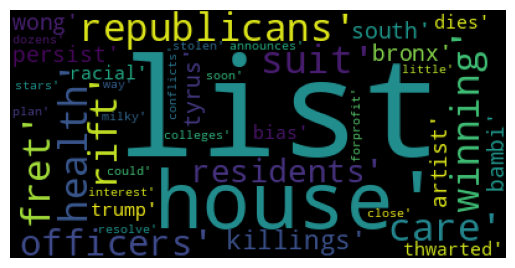

In [40]:
text = data_frame['title'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

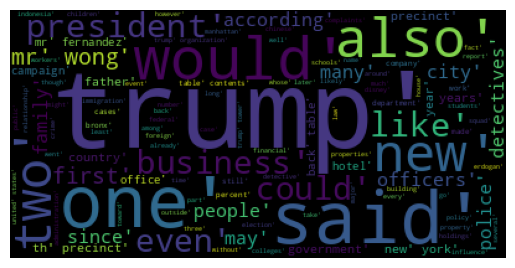

In [41]:
text = data_frame['content'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
FREQUENT_WORDS_TITLE = set(word for (word, word_count) in get_most_frequently_words("title", word_counter_title).most_common(20))
FREQUENT_WORDS_CONTENT = set(word for (word, word_count) in get_most_frequently_words("content", word_counter_content).most_common(20))

def remove_frequent_words(string_text, frequent_words):
    return [word for word in string_text if word not in frequent_words]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_frequent_words(x, FREQUENT_WORDS_TITLE))

data_frame.head(1)

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[republicans, fret, winning, health, care, suit]",new york times,carl hulse,2016,12,"[washington, congressional, republicans, fear, comes, health, care, lawsuit, administration, might, win, incoming, administration, could, choose, longer, defend, executive, branch, suit, challenges, administration, authority, spend, billions, dollars, health, insurance, subsidies, americans, handing, republicans, big, victory, issues, sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, leaving, millions, without, access, health, insurance, republicans, prepared, replacement, could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, stave, outcome, republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, health, care, law, angering, conservative, voters, demanding, end, law, years, another, twist, administration, worried, preserving, executive, branch, prerogatives, could, choose, ...]",31


## 12- Remove Rare words

In [44]:
RARE_WORDS_TITLE = set(word for (word, word_count) in get_most_frequently_words("title", word_counter_title).most_common()[:-20:-1])
RARE_WORDS_CONTENT = set(word for (word, word_count) in get_most_frequently_words("content", word_counter_content).most_common()[:-20:-1])

def remove_rare_words(string_text, rare_words):
    return [word for word in string_text if word not in rare_words]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_rare_words(x, RARE_WORDS_TITLE))

data_frame.head(1)

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[republicans, fret, winning, health, care, suit]",new york times,carl hulse,2016,12,"[washington, congressional, republicans, fear, comes, health, care, lawsuit, administration, might, win, incoming, administration, could, choose, longer, defend, executive, branch, suit, challenges, administration, authority, spend, billions, dollars, health, insurance, subsidies, americans, handing, republicans, big, victory, issues, sudden, loss, disputed, subsidies, could, conceivably, cause, health, care, program, implode, leaving, millions, without, access, health, insurance, republicans, prepared, replacement, could, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, stave, outcome, republicans, could, find, awkward, position, appropriating, huge, sums, temporarily, prop, health, care, law, angering, conservative, voters, demanding, end, law, years, another, twist, administration, worried, preserving, executive, branch, prerogatives, could, choose, ...]",31


## 13- Stemming

In [48]:
porter_stemmer_title = PorterStemmer()
porter_stemmer_content = PorterStemmer()
def stemming_words(text, porter_stemmer):
    return [porter_stemmer.stem(word) for word in text]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: stemming_words(x, porter_stemmer_title))

data_frame.head()

,Unnamed: 0,title,publication,author,year,month,content,day
0,0,"[republican, fret, win, health, care, suit]",new york times,carl hulse,2016,12,"[washington, congression, republican, fear, come, health, care, lawsuit, administr, might, win, incom, administr, could, choos, longer, defend, execut, branch, suit, challeng, administr, author, spend, billion, dollar, health, insur, subsidi, american, hand, republican, big, victori, issu, sudden, loss, disput, subsidi, could, conceiv, caus, health, care, program, implod, leav, million, without, access, health, insur, republican, prepar, replac, could, lead, chao, insur, market, spur, polit, backlash, republican, gain, full, control, govern, stave, outcom, republican, could, find, awkward, posit, appropri, huge, sum, temporarili, prop, health, care, law, anger, conserv, voter, demand, end, law, year, anoth, twist, administr, worri, preserv, execut, branch, prerog, could, choos, ...]",31
1,1,"[rift, offic, resid, kill, persist, south, bronx]",new york times,benjamin mueller and al baker,2017,6,"[bullet, shell, get, count, blood, dri, votiv, candl, burn, peer, window, see, crime, scene, gone, cold, band, yellow, tape, blow, breez, south, bronx, across, harlem, river, manhattan, shorthand, urban, dysfunct, still, suffer, violenc, level, long, ago, slash, mani, part, york, citi, yet, citi, effort, fight, remain, splinter, underfund, burden, scandal, th, precinct, southern, tip, bronx, poor, minor, neighborhood, across, countri, long, hound, infract, cri, protect, grievou, injuri, death, septemb, four, everi, five, shoot, precinct, year, unsolv, citi, precinct, th, highest, murder, rate, fewest, detect, per, violent, crime, reflect, dispar, staf, hit, hardest, neighborhood, outsid, manhattan, accord, york, time, analysi, depart, ...]",19
2,2,"[tyru, wong, bambi, artist, thwart, racial, bia, die]",new york times,margalit fox,2017,1,"[walt, disney, bambi, open, critic, prais, spare, haunt, visual, style, vastli, differ, anyth, disney, done, know, film, strike, appear, creat, chines, immigr, artist, took, inspir, landscap, paint, song, dynasti, extent, contribut, bambi, remain, mark, film, anim, would, wide, known, decad, like, film, titl, charact, artist, tyru, wong, weather, irrevoc, separ, mother, hope, make, life, incarcer, isol, rigor, interrog, still, child, year, follow, endur, poverti, discrimin, chronic, lack, recognit, work, disney, also, fine, art, find, acclaim, mr, wong, die, friday, hollywood, studio, artist, painter, printmak, calligraph, illustr, later, year, maker, fantast, kite, celebr, artist, th, centuri, margin, long, subject, pass, much, ...]",6
3,3,"[among, death, heavi, toll, pop, music]",new york times,william mcdonald,2017,4,"[death, may, great, equal, necessarili, evenhand, field, endeavor, suffer, mortal, loss, consid, muhammad, ali, arnold, palmer, sport, hollywood, death, carri, fisher, debbi, reynold, pop, music, world, hand, bleakest, year, start, david, bowi, whose, stage, persona, androgyn, glam, rocker, danc, pop, star, electron, experimentalist, music, year, day, old, came, die, cancer, hint, time, short, lyric, final, album, releas, two, day, death, otherwis, gone, great, length, hide, ill, public, wish, privaci, ensur, death, would, appear, come, blue, came, anoth, shock, three, month, later, princ, accident, overdos, painkil, collaps, elev, sprawl, home, studio, near, minneapoli, death, came, indic, includ, princ, roger, nelson, seen, ...]",10
4,4,"[kim, jongun, north, korea, prepar, test, longrang, missil]",new york times,choe sang-hun,2017,1,"[seoul, south, korea, north, korea, leader, kim, said, sunday, countri, make, final, prepar, conduct, test, intercontinent, ballist, missil, bold, statement, less, month, inaugur, although, north, korea, conduct, five, nuclear, test, last, decad, ballist, missil, test, alon, although, habitu, threaten, unit, state, nuclear, weapon, countri, never, intercontinent, ballist, missil, icbm, annual, year, day, speech, b

## POS and Lemmitization

In [53]:
lemmatizer_title = WordNetLemmatizer()
lemmatizer_content = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text, lemmatizer):
    # apply POS tagging
    pos_text = pos_tag(text)
    return [lemmatizer.lemmatize(word, wordnet_map.get(pos[0],  wordnet.NOUN)) for word, pos in pos_text]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: lemmatize_words(x, lemmatizer_title))

# Data Preprocessing
## 1- Dealing with categorical data (Nominal Data)
### a- Preprocess [ publication ]

In [54]:
# get number of unique values in publication column
publication_unique_values = data_frame["publication"].unique()
print("Publication unique values = ", len(publication_unique_values))

Publication unique values =  5


In [55]:
# apply one hot encoding in publication column
data_frame = pd.get_dummies(data=data_frame, columns=["publication"])
data_frame.dtypes

,0
Unnamed: 0,int64
title,object
author,object
year,Int64
month,Int64
content,object
day,int32
publication_atlantic,boolean
publication_breitbart,boolean
publication_business insider,boolean


### b- Preprocess [ author ]

In [56]:
# clean author
def clean_name(name):
    name = name.strip() # remove spaces after and before string
    name = " ".join(name.split()) # remove extra spaces between words
    name = re.sub(r'^.\s|\s.$', "", name) # remove single character in beginning and end of string

    if len(name) > 1:
        return name

author_unique_values = Counter()
def get_unique_names(author_list):
    for name in author_list:
        if name!=None and len(name) > 1:
            author_unique_values[name] += 1 # get unique values

def preprocess_author(text):
    text = re.sub(r'[a-z]{1}\.|\(.*\)', "", text) # remove single character in beginning and end of string
    author_list = re.split('with|and|,|&', text)
    author_list = [clean_name(name) for name in author_list]

    # check if there is a None value
    if None in author_list:
        author_list.remove(None)

    get_unique_names(author_list)
    return author_list

data_frame["author"] = data_frame["author"].apply(lambda x: preprocess_author(x))
data_frame["author"]

,author
0,[carl hulse]
1,"[benjamin mueller, al baker]"
2,[margalit fox]
3,[william mcdonald]
4,[choe sang-hun]
...,...
49995,[robinson meyer]
49996,[amy zegart]
49997,[jeremy venook]
49998,[emily deruy]


In [59]:
# get number of empty cells in author
result = data_frame['author'].apply(lambda x: isinstance(x, list) and len(x) == 0)
count = result.sum()

# Print the count
print("Number of empty cells is:",count)

Number of empty cells is: 1


In [60]:
# make empty cell = null
data_frame["author"] = data_frame["author"].apply(lambda y: np.nan if len(y)==0 else y)

# remove rows with NaN values
data_frame.dropna(inplace=True)

# get number of empty cells in author
result = data_frame['author'].apply(lambda x: isinstance(x, list) and len(x) == 0)
count = result.sum()

# Print the count
print("Number of empty cells is:",count)

Number of empty cells is: 0


In [61]:
#filtered author column to make each row contain only one author
def filtered_author(author_list):
    frequency = []
    for author in author_list:
        frequency.append(author_unique_values[author])

    # Find the minimum number in the list
    min_number_index = frequency.index(min(frequency))
    return author_list[min_number_index]

data_frame["author"] = data_frame["author"].apply(lambda x: filtered_author(x))

data_frame["author"]

,author
0,carl hulse
1,benjamin mueller
2,margalit fox
3,william mcdonald
4,choe sang-hun
...,...
49995,robinson meyer
49996,amy zegart
49997,jeremy venook
49998,emily deruy


In [62]:
# apply mapping in author
mapping_author = {}
for index, author in enumerate(list(author_unique_values.keys())):
    mapping_author[author] = index

data_frame = data_frame.replace ({
    "author": mapping_author
})

print("Number of unique values =", len(author_unique_values))
data_frame["author"]

Number of unique values = 2351


<ipython-input-62-fa450685b2d8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_frame = data_frame.replace ({


,author
0,0.0
1,1.0
2,3.0
3,4.0
4,5.0
...,...
49995,2289.0
49996,2324.0
49997,2300.0
49998,2277.0
